<a href="https://colab.research.google.com/github/EmaaPop/Slotted-ALOHA-Simulation/blob/main/Slotted_Aloha_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Slotted-Aloha Simulation

### Rules:

* Nodes transimit new packets according to a Poisson process and retransmit packets after some random time if collision is detected
* Time is slotted, and a packet can only be transmitted at the beginning of the slot
* After transmitting a packet, the node transmits a new packet after a random time offset, regardless of whether the transmission was successful or not
* The random time offset follows the uniform distribution within [0, W)

### Tasks:

* Simulates N senders for 100000 time slots
* The **slot efficiency** is defined as *# of successful slots / # of total slots*
  * Successful slot means that there is one and only one transmitted packet in the slot
  * No transmission or two or more transmission in a slot is considered not successful
* Implements the slotted ALOHA simulation
* Represents in a Pandas Dataframe our results (Number of nodes, Slot efficiency)
* Plots the slot efficiency graph while varying the number of nodes N from 1 to 64
* Each group has a different window size:
    * Group 1 --> 4
    * Group 2 --> 8
    * Group 3 --> 16
    * Group 4 --> 32
    * Group 5 --> 64
    * Group 6 --> 128

### Tips:

* Iterate through different scenarios of numbers of nodes (first only one, then two, ...)
* Each Node has a TTL (number of slots after which it will transmit, for example if a node has TTL=7, it will wait 7 slots before transmitting). TTL has to be generated randomly (between a specific range...)
* Consider each slot and the number of nodes you have for that scenario, see how many nodes are going to transmit during that particular slot. If only one transmits, that is a successful slot (remember that after the transmission, the node may want to transmit again later). If no nodes or more than one nodes transmit, that is a not successful slot (remember what happens after a collision...)
* For each slot, calculate its efficiency

### Initial code:

In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Total number of slots
TSLOTS = 100000

In [ ]:
# This class represents a node that wants to transmit. It will transmit after a certain number of slots (ttl)
# Each node needs to have a classNode instance with a random ttl

class classNode:
	def __init__(self, ttl):
		self.ttl = ttl # number of slots left until transmission
	def tick(self):
		self.ttl = self.ttl - 1 # Decrease number of slots

## My Code

Window size:  8
N =  1: 0.223590
N =  2: 0.345660
N =  3: 0.402250
N =  4: 0.419470
N =  5: 0.409450
N =  6: 0.380950
N =  7: 0.342510
N =  8: 0.307890
N =  9: 0.268090
N = 10: 0.231440
N = 11: 0.198040
N = 12: 0.169510
N = 13: 0.141430
N = 14: 0.118440
N = 15: 0.098450
N = 16: 0.081060
N = 17: 0.068880
N = 18: 0.056470
N = 19: 0.045880
N = 20: 0.036980
N = 21: 0.031450
N = 22: 0.025150
N = 23: 0.019850
N = 24: 0.016790
N = 25: 0.013260
N = 26: 0.010690
N = 27: 0.008740
N = 28: 0.006710
N = 29: 0.005880
N = 30: 0.004380
N = 31: 0.003890
N = 32: 0.002930
N = 33: 0.002420
N = 34: 0.001680
N = 35: 0.001410
N = 36: 0.001100
N = 37: 0.000950
N = 38: 0.000750
N = 39: 0.000550
N = 40: 0.000450
N = 41: 0.000240
N = 42: 0.000340
N = 43: 0.000190
N = 44: 0.000250
N = 45: 0.000090
N = 46: 0.000170
N = 47: 0.000050
N = 48: 0.000020
N = 49: 0.000070
N = 50: 0.000070
N = 51: 0.000030
N = 52: 0.000050
N = 53: 0.000020
N = 54: 0.000020
N = 55: 0.000010
N = 56: 0.000020
N = 57: 0.000000
N = 58: 0.00000

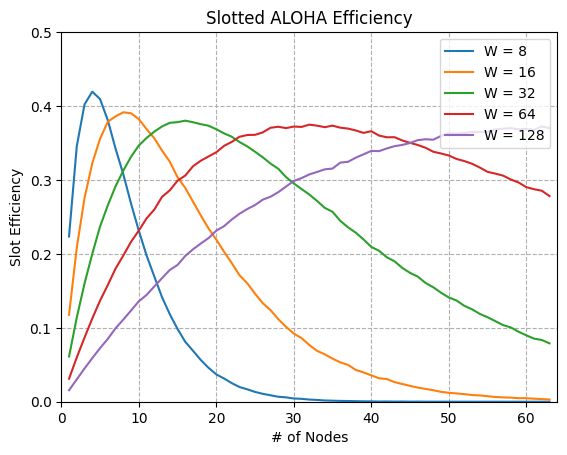

In [ ]:
def main():
    random.seed()

    for window_size in [8, 16, 32, 64, 128]:
        Nlist = []
        selist = []
        print("Window size: {0:2d}".format(window_size))

        for N in range(1, 64):
            snode = [ classNode(random.randrange(0, window_size)) for _ in range(N) ]
            successful_slots = 0
            slot_efficiency = 0

            for slot in range(TSLOTS):
                transmitted_nodes = []

                for i in range(N):
                    if not snode[i].ttl:
                        transmitted_nodes.append(i)
                        snode[i].ttl = random.randrange(0, window_size)
                    else:
                        snode[i].tick()

                if not transmitted_nodes:
                    pass

                if (len(transmitted_nodes) == 1):
                    successful_slots = successful_slots + 1

                if (len(transmitted_nodes) > 2):
                    for j in transmitted_nodes:
                        snode[j].ttl = random.randrange(0, window_size)

            slot_efficiency = (successful_slots/float(TSLOTS))

            print("N = {0:2d}: {1:f}".format(N, slot_efficiency))

            Nlist.append(N)
            selist.append(slot_efficiency)

        plt.plot(Nlist, selist)
        print ("")

    plt.xlabel("# of Nodes")
    plt.ylabel("Slot Efficiency")
    plt.legend(['W = 8', 'W = 16', 'W = 32', 'W = 64', 'W = 128'], loc='upper right')
    plt.axis([0, 64, 0, 0.5])
    plt.title('Slotted ALOHA Efficiency')
    plt.grid(linestyle='--')
    plt.show()

    return


if __name__ == "__main__":
    main()